## Importing neccessary libraries

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
warnings.filterwarnings("ignore")
import scipy.stats as stats


In [337]:
#pip install xgboost

## Loading dataset

In [338]:
df=pd.read_csv('antenna.csv')

In [339]:
print("No of rows", df.shape[0])
print("No of columns/features", df.shape[1])

No of rows 572
No of columns/features 13


In [340]:
df.columns

Index(['Wm', 'W0m', 'dm', 'tm', 'rows', 'Xa', 'Ya', 'gain', 'vswr',
       'bandwidth', 's', 'pr', 'p0'],
      dtype='object')

In [341]:
df.sample(5)

,Wm,W0m,dm,tm,rows,Xa,Ya,gain,vswr,bandwidth,s,pr,p0
348,2142.9,488.57,488.570,214.29,5.0,5954.3,2142.9,2.875926,1.066427,122.2200,-29.857512,0.214556,0.498314
279,2142.9,488.57,214.290,214.29,7.0,8365.0,2142.9,2.877080,1.174090,122.8500,-21.930058,0.214687,0.498541
212,2142.9,488.57,77.143,214.29,3.0,3543.5,6964.3,2.837064,1.637278,120.7497,-12.336544,0.198103,0.464353
395,2142.9,651.43,77.143,214.29,7.0,8365.0,2142.9,2.930689,1.167852,122.8500,-22.222073,0.216966,0.498669
410,2142.9,651.43,214.290,214.29,3.0,5954.3,6964.3,2.761721,1.659612,119.4901,-12.110598,0.194560,0.462659


<b> WM </b> - Width and height of SRR cell

<b> W0m </b> - Gap between rings

<b> dm </b> - Distance between rings

<b> tm </b> - Width of the rings

<b> rows </b> - Number of SRR cells in a array

<b> Xa </b> - Distance between antenna patch and array

<b> Ya </b> - Distance between SRR cells in the array

<b> gain </b> - Antenna gain

<b> vswr </b> - Voltage Standing Wave Ratio of the antenna

<b> s </b> - Return Loss (S11) of the antenna

<b> pr </b> - Power radiated by antenna

<b> p0 </b> - Power accepted by antenna

<b> bandwidth </b> - Bandwidth of the antenna

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Wm         572 non-null    float64
 1   W0m        572 non-null    float64
 2   dm         572 non-null    float64
 3   tm         572 non-null    float64
 4   rows       572 non-null    float64
 5   Xa         572 non-null    float64
 6   Ya         572 non-null    float64
 7   gain       572 non-null    float64
 8   vswr       572 non-null    float64
 9   bandwidth  509 non-null    float64
 10  s          572 non-null    float64
 11  pr         572 non-null    float64
 12  p0         572 non-null    float64
dtypes: float64(13)
memory usage: 58.2 KB


In [343]:
df.describe()

,Wm,W0m,dm,tm,rows,Xa,Ya,gain,vswr,bandwidth,s,pr,p0
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,509.000000,572.000000,572.000000,572.000000
mean,2244.048252,400.594178,275.425776,224.404825,4.097902,4063.246329,6947.469755,2.678568,2.094927,118.036075,-16.104948,0.192872,0.456955
std,691.578895,184.905214,150.901130,69.157890,1.443942,3287.862064,5136.193313,0.683242,1.914750,11.553491,7.897142,0.046994,0.089213
min,2142.900000,162.860000,77.143000,214.290000,3.000000,0.000000,2142.900000,-5.654378,1.041183,32.759900,-33.903172,0.037383,0.186297
25%,2142.900000,162.860000,77.143000,214.290000,3.000000,1132.800000,2142.900000,2.815006,1.187911,119.490100,-21.321550,0.200121,0.470947
50%,2142.900000,325.710000,214.290000,214.290000,3.000000,3543.500000,6964.300000,2.876220,1.438023,122.220100,-14.910812,0.211927,0.490360
75%,2142.900000,488.570000,351.430000,214.290000,5.000000,5954.300000,11786.000000,2.921877,1.725260,123.269800,-11.498286,0.214335,0.497100
max,6964.300000,651.430000,488.570000,696.430000,7.000000,10776.000000,16607.000000,3.238539,8.377999,124.740100,-2.083432,0.229538,0.499826


In [344]:
print("Duplicate rows :", df.duplicated().sum())

Duplicate rows : 0


In [345]:
print("Null Values :\n" , df.isnull().sum())

Null Values :
 Wm            0
W0m           0
dm            0
tm            0
rows          0
Xa            0
Ya            0
gain          0
vswr          0
bandwidth    63
s             0
pr            0
p0            0
dtype: int64


#### Bandwidth column has 63 null values.

In [355]:
df[df['bandwidth'].isnull()].sample(10)

,Wm,W0m,dm,tm,rows,Xa,Ya,gain,vswr,bandwidth,s,pr,p0
429,2142.9,651.43,214.290,214.29,7.0,0.0,2142.9,1.477842,6.862902,NaN,-2.549404,0.067905,0.217220
148,2142.9,325.71,351.430,214.29,5.0,0.0,6964.3,1.511379,7.259340,NaN,-2.408336,0.064966,0.207837
359,2142.9,651.43,77.143,214.29,3.0,0.0,6964.3,1.238514,8.339216,NaN,-2.093215,0.055264,0.186966
167,2142.9,162.86,77.143,214.29,5.0,0.0,2142.9,1.198721,8.013532,NaN,-2.179165,0.056752,0.193280
69,2142.9,325.71,77.143,214.29,5.0,0.0,2142.9,1.222972,7.960146,NaN,-2.193935,0.057337,0.194275
281,2142.9,488.57,351.430,214.29,3.0,0.0,6964.3,1.499606,7.381595,NaN,-2.367948,0.064282,0.205250
397,2142.9,651.43,214.290,214.29,3.0,0.0,6964.3,1.261518,8.000241,NaN,-2.182823,0.057528,0.193041
436,2142.9,651.43,351.430,214.29,3.0,0.0,6964.3,1.476910,7.381446,NaN,-2.367997,0.064014,0.205253
25,2142.9,162.86,351.430,214.29,7.0,0.0,2142.9,1.432894,6.985483,NaN,-2.504040,0.066392,0.214389
196,2142.9,325.71,488.570,214.29,7.0,0.0,2142.9,1.486566,6.998670,NaN,-2.499256,0.066926,0.214082


#### Data is missing at random

## Handling missing values

In [347]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance')
newdf = imputer.fit_transform(df)


In [348]:
newdf = pd.DataFrame(newdf, columns = df.columns)
newdf.sample(5)

,Wm,W0m,dm,tm,rows,Xa,Ya,gain,vswr,bandwidth,s,pr,p0
250,2142.9,488.57,214.29,214.29,3.0,3543.5,2142.9,2.848451,1.226711,122.430000,-19.843813,0.212834,0.497095
86,2142.9,325.71,214.29,214.29,3.0,0.0,6964.3,1.239982,8.016449,119.395092,-2.178364,0.057209,0.192745
555,2142.9,162.86,214.29,214.29,7.0,10776.0,2142.9,2.875105,1.175668,122.640200,-21.858011,0.214638,0.498507
428,2142.9,651.43,214.29,214.29,5.0,8365.0,6964.3,2.872507,1.612567,121.380100,-12.598273,0.199188,0.466185
563,2142.9,162.86,351.43,214.29,3.0,1132.8,11786.0,2.907973,1.441357,123.480100,-14.856820,0.211053,0.487962


In [349]:
print("Null Values :\n" , newdf.isnull().sum())

Null Values :
 Wm           0
W0m          0
dm           0
tm           0
rows         0
Xa           0
Ya           0
gain         0
vswr         0
bandwidth    0
s            0
pr           0
p0           0
dtype: int64


In [586]:
newdf.corr()['W0m']

Wm          -0.177620
W0m          1.000000
dm           0.073951
tm          -0.177620
rows         0.046203
Xa          -0.095618
Ya           0.002780
gain         0.039155
vswr         0.022681
bandwidth    0.014018
s           -0.003184
pr          -0.005420
p0          -0.015468
Name: W0m, dtype: float64

In [263]:
### Our target col => W0m, dm, tm,rows, Xa, Ya
### Our input cols => gain, bandwidth, pr, p0

## EDA

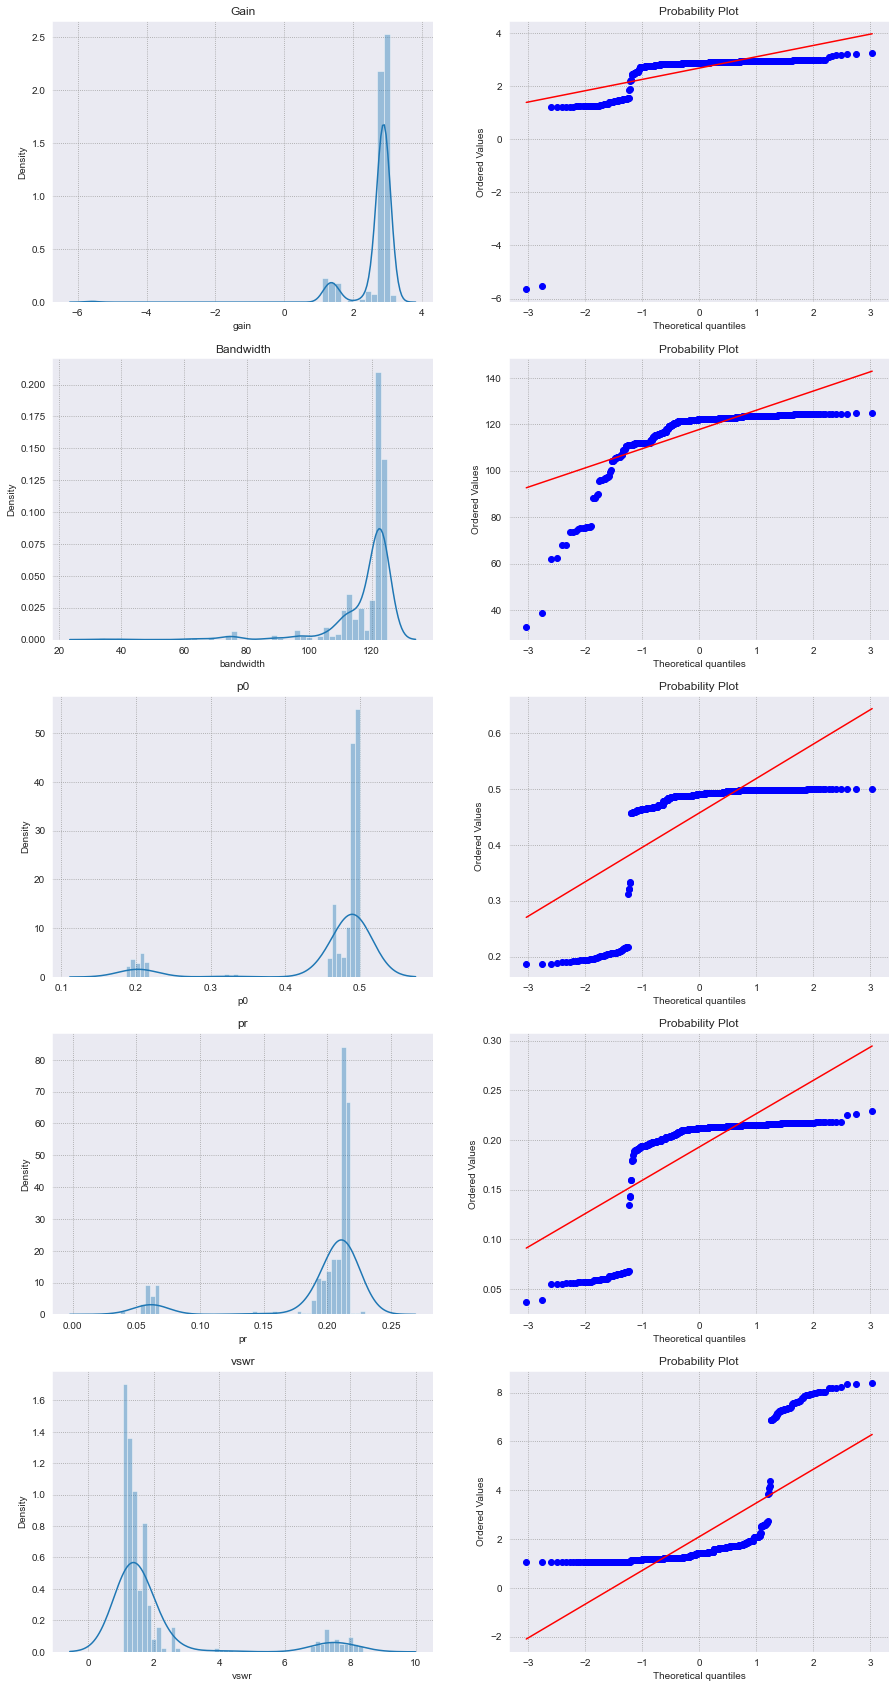

In [264]:
plt.figure(figsize=(15,30))
plt.subplot(5,2,1)
sns.distplot(newdf['gain'])
plt.title('Gain')
plt.subplot(5,2,2)
stats.probplot(newdf['gain'], dist="norm", plot=plt)




plt.subplot(5,2,3)
sns.distplot(newdf['bandwidth'])
plt.title('Bandwidth')
plt.subplot(5,2,4)
stats.probplot(newdf['bandwidth'], dist="norm", plot=plt)




plt.subplot(5,2,5)
sns.distplot(newdf['p0'])
plt.title('p0')
plt.subplot(5,2,6)
stats.probplot(newdf['p0'], dist="norm", plot=plt)


plt.subplot(5,2,7)
sns.distplot(newdf['pr'])
plt.title('pr')
plt.subplot(5,2,8)
stats.probplot(newdf['pr'], dist="norm", plot=plt)


plt.subplot(5,2,9)
sns.distplot(newdf['vswr'])
plt.title('vswr')
plt.subplot(5,2,10)
stats.probplot(newdf['vswr'], dist="norm", plot=plt)



plt.show()

### Skewness

In [265]:
print('BW skewness',newdf['bandwidth'].skew())
print('gain skewness',newdf['gain'].skew())
print('pr skewness',newdf['pr'].skew())
print('p0 skewness',newdf['p0'].skew())
print('vswr skewness',newdf['vswr'].skew())

BW skewness -3.653172153649542
gain skewness -6.962941732729724
pr skewness -2.3742619555511584
p0 skewness -2.430933839214271
vswr skewness 2.423219507694864


#### Highly skewed dataset

## Test-Train

In [357]:
df1=newdf.drop(['s','Wm'], axis=1)

In [358]:
df1.sample(5)

,W0m,dm,tm,rows,Xa,Ya,gain,vswr,bandwidth,pr,p0
523,162.86,351.430,696.43,3.0,0.0,6964.3,2.802391,4.106373,111.430479,0.134077,0.321440
274,488.57,214.290,214.29,7.0,0.0,2142.9,1.460057,6.886494,111.859396,0.067512,0.216677
532,162.86,214.290,214.29,3.0,10776.0,2142.9,2.843330,1.242794,122.430100,0.212210,0.496597
479,651.43,488.570,214.29,3.0,1132.8,2142.9,2.878183,1.176413,122.429900,0.214630,0.498434
200,162.86,77.143,214.29,5.0,1132.8,6964.3,2.881591,1.683078,118.019800,0.197069,0.460870


In [359]:
y=df1.iloc[:,0:6]
X=df1.iloc[:,6:]

In [360]:
y.shape

(572, 6)

In [361]:
X.shape

(572, 5)

In [368]:
from sklearn.model_selection import train_test_split

In [532]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [533]:
X_train.shape

(457, 5)

In [534]:
X_test.shape

(115, 5)

In [535]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

In [536]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [537]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [538]:
from sklearn.preprocessing import PowerTransformer
# from sklearn.preprocessing import QuantileTransformer


In [563]:
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'Yeo-Johnson_lambdas':pt.lambdas_})

,cols,Yeo-Johnson_lambdas
0,gain,9.994155
1,vswr,-2.915630
2,bandwidth,14.781853
3,pr,42.487832
4,p0,29.269346


In [564]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

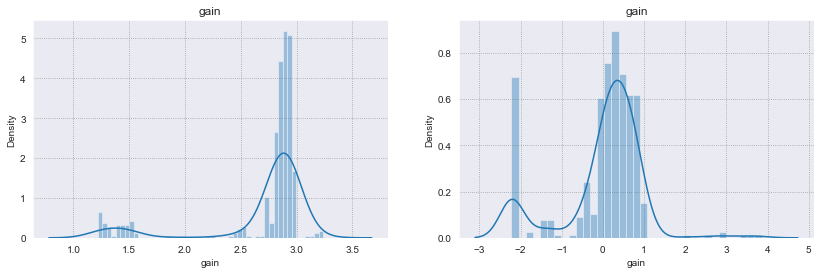

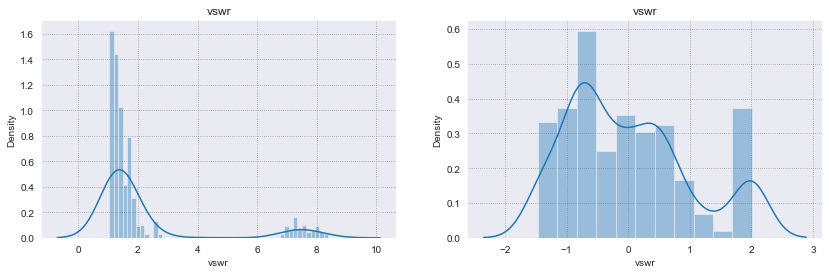

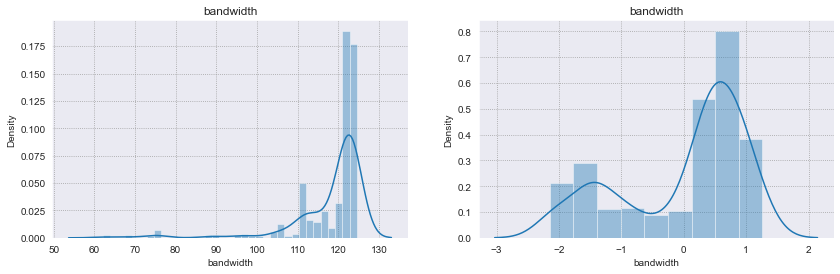

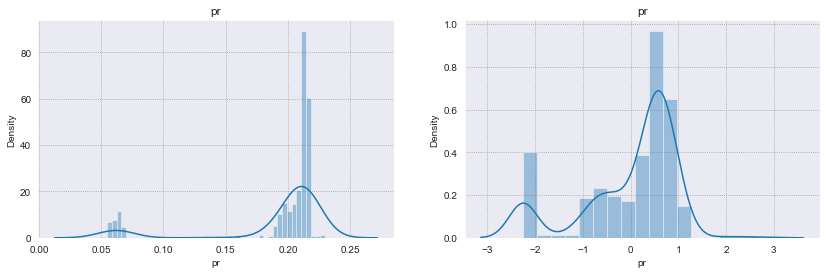

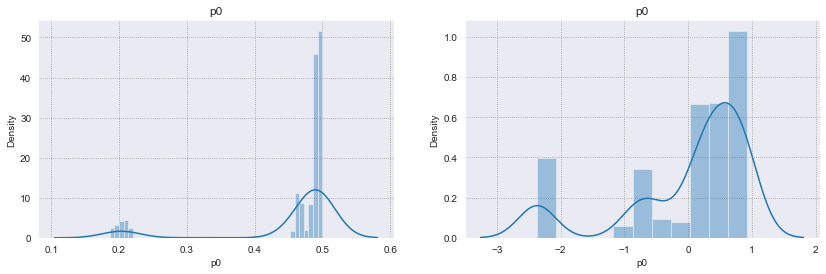

In [565]:

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

In [566]:
print('BW skewness',X_train_transformed['bandwidth'].skew())
print('gain skewness',X_train_transformed['gain'].skew())
print('pr skewness',X_train_transformed['pr'].skew())
print('p0 skewness',X_train_transformed['p0'].skew())
print('vswr skewness',X_train_transformed['vswr'].skew())

BW skewness -0.813825774067633
gain skewness -0.7895323051517374
pr skewness -1.171436135174017
p0 skewness -1.4317048759004694
vswr skewness 0.6310881108678895


In [567]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [568]:
reg1= LinearRegression()
reg2 =RandomForestRegressor(n_estimators = 500, random_state =42, criterion='squared_error', max_features='auto', bootstrap=True,)
reg3= KNeighborsRegressor(n_neighbors=10,weights='distance',p=1,)
reg4= ExtraTreesRegressor(n_estimators=500, criterion='absolute_error',max_features='log2',random_state=42)
reg5= XGBRegressor(booster='dart',eta=0.05,gamma=1)

In [569]:
reg1.fit(X_train_transformed,y_train)
reg2.fit(X_train_transformed,y_train)
reg3.fit(X_train_transformed,y_train)
reg4.fit(X_train_transformed,y_train)
reg5.fit(X_train_transformed,y_train)
    
y_pred1 = reg1.predict(X_test_transformed)
y_pred2= reg2.predict(X_test_transformed)
y_pred3 = reg3.predict(X_test_transformed)
y_pred4 = reg4.predict(X_test_transformed)
y_pred5 = reg5.predict(X_test_transformed)

    
print("R2 Score LR",r2_score(y_test,y_pred1))
print("R2 score RF",r2_score(y_test,y_pred2))
print("R2 score KN reg",r2_score(y_test,y_pred3))
print("R2 score ETR",r2_score(y_test,y_pred4))
print("R2 score XGB",r2_score(y_test,y_pred5))


R2 Score LR 0.2302777841386925
R2 score RF 0.5770600541418195
R2 score KN reg 0.5066918659193129
R2 score ETR 0.5799156791365824
R2 score XGB 0.4954825834261114


In [570]:
from sklearn.multioutput import MultiOutputRegressor

In [571]:
model = MultiOutputRegressor(estimator=reg2)

In [572]:
model.fit(X_train_transformed, y_train)
score = model.score(X_train_transformed, y_train)
print("Training score:", score)

y_predicted=model.predict(X_test_transformed)
print("R2 score",r2_score(y_test,y_predicted))
print('MAE',mean_absolute_error(y_test,y_predicted))
print('MSE',mean_squared_error(y_test,y_predicted))

Training score: 0.9508059466025102
R2 score 0.526073285908227
MAE 163.76873772464026
MSE 307545.57632876793


In [573]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [574]:
from numpy import absolute
from numpy import mean
from numpy import std

In [587]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(reg4, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: 166.888 (32.453)
